In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Space_Missions.csv")
df.head(2)

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success


In [4]:
df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis="columns", inplace=True)


In [5]:
df.isna().sum()

Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

In [6]:
df.describe()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


In [8]:
df['Status Mission'].value_counts()

Status Mission
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [9]:
df.dtypes

Company Name      object
Location          object
Datum             object
Detail            object
Status Rocket     object
 Rocket           object
Status Mission    object
dtype: object

In [5]:
# Function to parse the dates
def parse_date(datum):
    try:
        return pd.to_datetime(datum, format='%a %b %d, %Y %H:%M %Z').date()
    except:
        return pd.to_datetime(datum, format='%a %b %d, %Y').date()

In [6]:
df['date'] = df['Datum'].apply(parse_date)

In [6]:
df.drop(columns=['Datum'], inplace=True)

In [10]:
df.head()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,date
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30


In [35]:
df['Company Name'].unique()

array(['SpaceX', 'CASC', 'Roscosmos', 'ULA', 'JAXA', 'Northrop', 'ExPace',
       'IAI', 'Rocket Lab', 'Virgin Orbit', 'VKS RF', 'MHI', 'IRGC',
       'Arianespace', 'ISA', 'Blue Origin', 'ISRO', 'Exos', 'ILS',
       'i-Space', 'OneSpace', 'Landspace', 'Eurockot', 'Land Launch',
       'CASIC', 'KCST', 'Sandia', 'Kosmotras', 'Khrunichev', 'Sea Launch',
       'KARI', 'ESA', 'NASA', 'Boeing', 'ISAS', 'SRC', 'MITT', 'Lockheed',
       'AEB', 'Starsem', 'RVSN USSR', 'EER', 'General Dynamics',
       'Martin Marietta', 'Yuzhmash', 'Douglas', 'ASI', 'US Air Force',
       'CNES', 'CECLES', 'RAE', 'UT', 'OKB-586', 'AMBA',
       "Arm??e de l'Air", 'US Navy'], dtype=object)

In [38]:
df['Company Name'].nunique()

56

In [9]:
def extract_country(location):
    # Split the location string by spaces and get the last element , which is country name
    country = location.split()[-1]
    return country

In [10]:
df['country'] = df['Location'].apply(extract_country)

In [13]:
df.head()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,date,country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,2020-08-07,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,2020-08-06,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,2020-08-04,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,2020-07-30,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,145.0,Success,2020-07-30,USA


In [45]:
df.country.unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'Zealand',
       'Russia', 'Site', 'France', 'Iran', 'India', 'Mexico', 'Sea',
       'Korea', 'Facility', 'Ocean', 'Brazil', 'Canaria', 'Kenya',
       'Australia'], dtype=object)

In [46]:
df.country.nunique()

20

In [48]:
df.country.value_counts()

country
Russia        1395
USA           1344
Kazakhstan     701
France         303
China          268
Japan          126
India           76
Ocean           36
Zealand         13
Iran            13
Israel          11
Kenya            9
Korea            8
Australia        6
Mexico           4
Sea              4
Brazil           3
Canaria          2
Site             1
Facility         1
Name: count, dtype: int64

In [49]:
df.country.describe()

count       4324
unique        20
top       Russia
freq        1395
Name: country, dtype: object

In [11]:
country_counts = df['country'].value_counts()
# Filter countries with counts <= 13
countries_to_keep = country_counts[country_counts > 13].index

# Filter the DataFrame to keep only rows where country is in countries_to_keep
df1 = df[df['country'].isin(countries_to_keep)]

In [40]:
df1.country.value_counts()

country
Russia        1395
USA           1344
Kazakhstan     701
France         303
China          268
Japan          126
India           76
Ocean           36
Name: count, dtype: int64

In [16]:
df1.country.nunique()

16

In [14]:
df1.describe()

,Company Name,Location,Detail,Status Rocket,Rocket,Status Mission,date,country
count,4309,4309,4309,4309,960,4309,4309,4309
unique,51,128,4263,2,55,4,3912,14
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success,1990-08-28,Russia
freq,1777,235,6,3531,136,3873,4,1395


In [15]:
df1['Status Mission'].value_counts()

Status Mission
Success              3834
Failure               314
Partial Failure        99
Prelaunch Failure       2
Name: count, dtype: int64

In [12]:
# Expected Outcome Number 1:
#             A detailed analysis of space missions starting from 1957, highlighting key events and technological advancements.

Total number of missions: 4249
Success: 3834
Failure: 314
Prelaunch Failure : 2
Partial Failure: 99


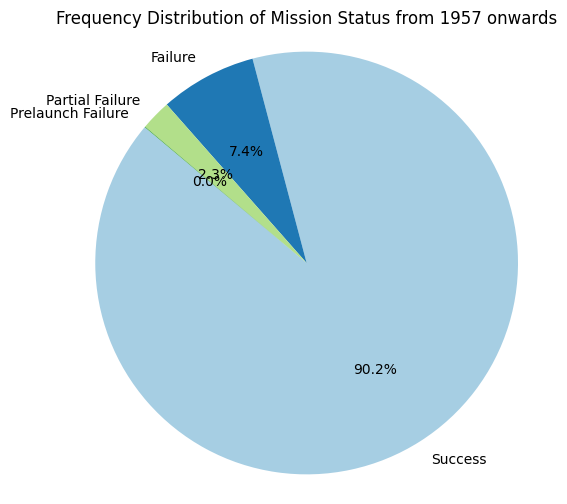

In [18]:
# 1.1 Overall Successfull vs Unsucessfull Mission Rate Throughout the world from 1957 onwards.
# Count the total number of missions
total_missions = df1['Status Mission'].count()

# Generate the frequency counts for 'Status Mission'
status_counts = df1['Status Mission'].value_counts()

# Print the mission summary
print(f"Total number of missions: {total_missions}")
print(f"Success: {status_counts.get('Success', 0)}")
print(f"Failure: {status_counts.get('Failure', 0)}")
print(f"Prelaunch Failure : {status_counts.get('Prelaunch Failure', 0)}")
print(f"Partial Failure: {status_counts.get('Partial Failure', 0)}")

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Frequency Distribution of Mission Status from 1957 onwards')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

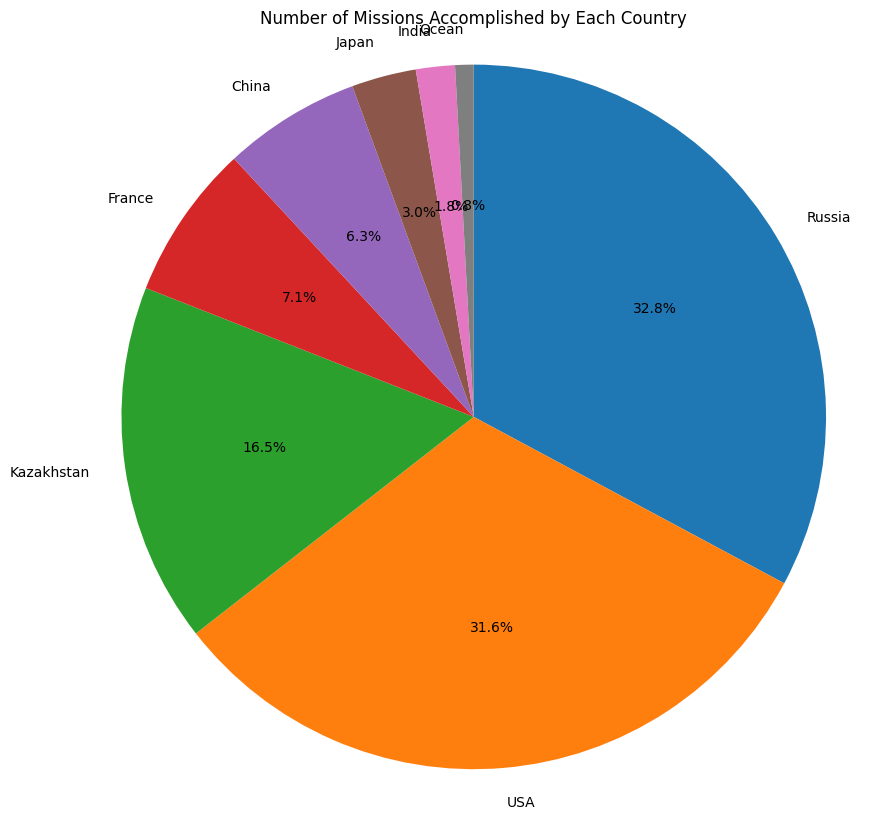

In [19]:
#1.2 Percentage of overall mission tried by different Companies.
country_counts = df1['country'].value_counts()

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add title
ax.set_title('Number of Missions Accomplished by Each Country')

plt.show()

In [21]:
#1.3 Creating Table showing statistics for each country .
#  I have added two new features just to summerize the performance of each countery individually.
#  i) Success Rate 
#  ii)Wpi
# Below is there explaination :
# Success Rate:
# Definition: This column calculates the ratio of the number of successful missions to the total number of missions attempted (both successful and failed missions).
# Explanation: It provides a measure of how many missions were successful out of all attempts.
# Purpose: This metric helps to understand the efficiency and effectiveness of a country's space missions.

# WPI (Weighted Performance Index):
#Formula : WPI=Success Rate×log(Total Missions+1) 
# This formula gives more weight to countries with higher numbers of missions while still considering the success rate.
# Reason of Creation : A country like russia did 1395 and successed in 1303 and have succees rate 93 and a country like frace done tried only 303 and 
#                      succeeded in   285  and have success rate of 94 . WPI is created which also consider total no of mission accomplish by country
#                      along with suceess rate.


# Extract necessary columns
data = df1[['country', 'Status Mission']]

# Group by country and Status Mission and count occurrences
status_counts = data.groupby(['country', 'Status Mission']).size().unstack(fill_value=0)

# Create the new DataFrame
country_details = pd.DataFrame({
    'Country Name': status_counts.index,
    'Success': status_counts.get('Success', 0),
    'Failure': status_counts.get('Failure', 0),
    'Prelaunch Failure': status_counts.get('Prelaunch Failure', 0),
    'Partial Failure': status_counts.get('Partial Failure', 0)
}).reset_index(drop=True)

# Calculate performance
country_details['Total Missions'] = country_details[['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure']].sum(axis=1)
country_details['Success Rate'] = country_details['Success'] / country_details['Total Missions'] * 100

# Calculate Weighted Performance Index (WPI)
country_details['WPI'] = country_details['Success Rate'] * np.log1p(country_details['Total Missions'])

# Display the final table
country_details

,Country Name,Success,Failure,Prelaunch Failure,Partial Failure,Total Missions,Success Rate,WPI
0,China,243,19,0,6,268,90.671642,507.281666
1,France,285,13,0,5,303,94.059406,537.740229
2,India,63,8,0,5,76,82.894737,360.078607
3,Japan,113,10,0,3,126,89.682540,434.439001
4,Kazakhstan,608,72,1,20,701,86.733238,568.443867
5,Ocean,33,3,0,0,36,91.666667,331.000809
6,Russia,1303,62,0,30,1395,93.405018,676.379947
7,USA,1186,127,1,30,1344,88.244048,635.723293


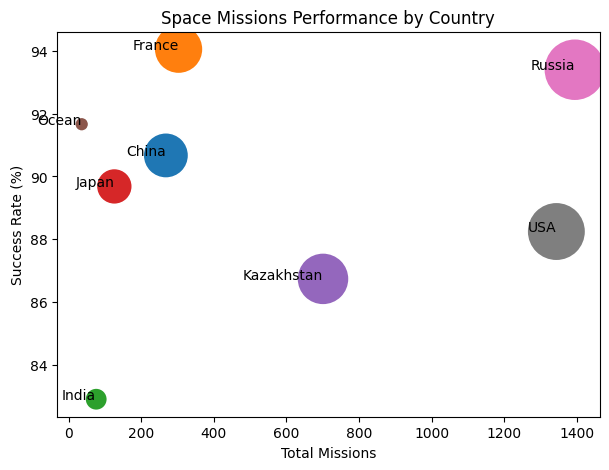

In [25]:
#1.4 A scatter plot to visulize the performance of country.
#  x_axis = no of total missions
#  y_axis = success rate
#  The size of the points tells total no of missions this country tried to accomplish comparitively.

# Plotting
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x='Total Missions', 
    y='Success Rate', 
    size='WPI', 
    sizes=(100, 2000), 
    hue='Country Name', 
    data=country_details, 
    legend=False
)
plt.title('Space Missions Performance by Country')
plt.xlabel('Total Missions')
plt.ylabel('Success Rate (%)')
for i in range(country_details.shape[0]):
    plt.text(
        x=country_details['Total Missions'][i], 
        y=country_details['Success Rate'][i], 
        s=country_details['Country Name'][i], 
        fontsize=10, 
        ha='right'
    )
plt.show()

In [28]:
# From the 1.3 table and 1.4 Scatter Plot , we conclude that 
#        Russia 


array(['USA', 'China', 'Kazakhstan', 'Japan', 'Russia', 'France', 'India',
       'Ocean'], dtype=object)

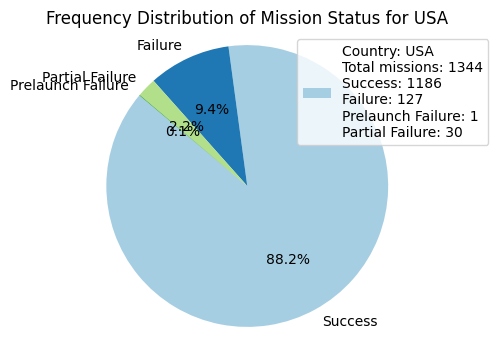

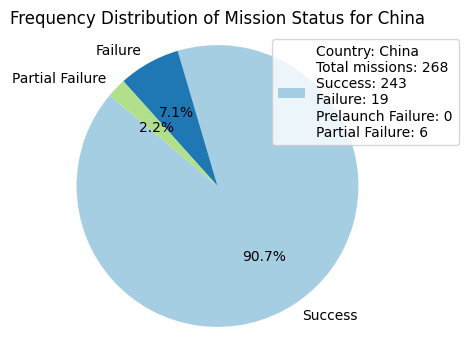

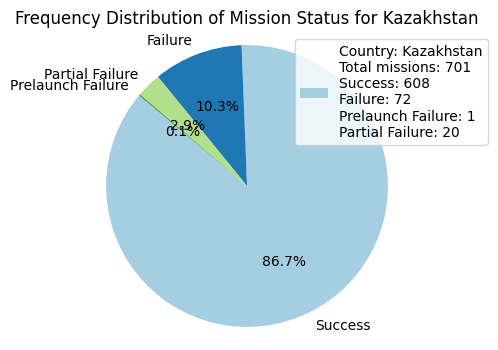

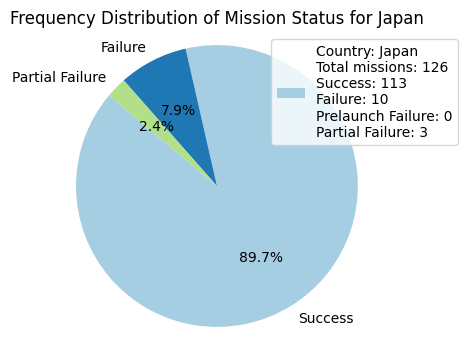

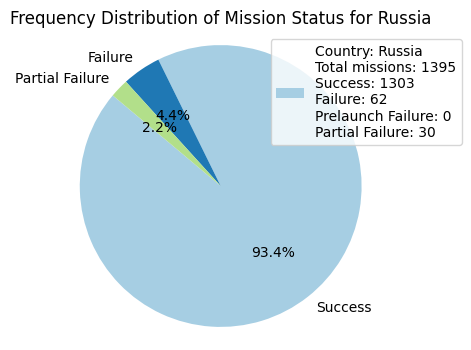

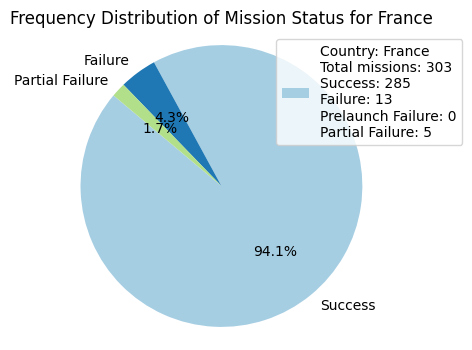

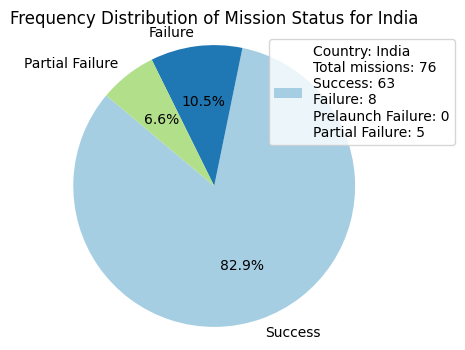

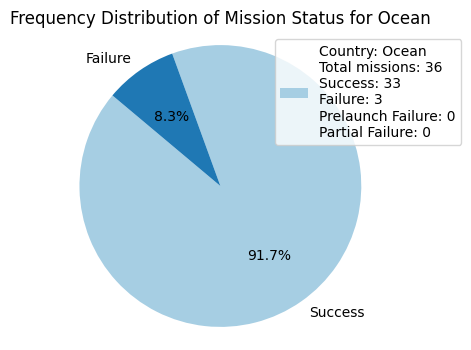

In [32]:
# 1.5 Pie-graph Successfull vs Unsucessfull Mission Rate By Each Country from 1957 onwords 
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame
def plot_status_mission_by_country(country_name):
    # Filter the DataFrame for the specified country
    country_df = df1[df1['country'] == country_name]

    # Check if there are any records for the specified country
    if country_df.empty:
        print(f"No records found for country: {country_name}")
        return

    # Generate the frequency counts for 'Status Mission'
    status_counts = country_df['Status Mission'].value_counts()

    # Total number of missions
    total_missions = len(country_df)

    # Create details string for the legend
    details = (f"Country: {country_name}\n"
               f"Total missions: {total_missions}\n"
               f"Success: {status_counts.get('Success', 0)}\n"
               f"Failure: {status_counts.get('Failure', 0)}\n"
               f"Prelaunch Failure: {status_counts.get('Prelaunch Failure', 0)}\n"
               f"Partial Failure: {status_counts.get('Partial Failure', 0)}")

    # Plotting the pie chart
    plt.figure(figsize=(4, 4))
    patches, texts, autotexts = plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title(f'Frequency Distribution of Mission Status for {country_name}')
    plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

    # Add legend with country details
    plt.legend(patches, [details], loc='upper right', bbox_to_anchor=(1.3, 1))

    plt.show()

country_names = df1['country'].unique()

for country in country_names:
    plot_status_mission_by_country(country)


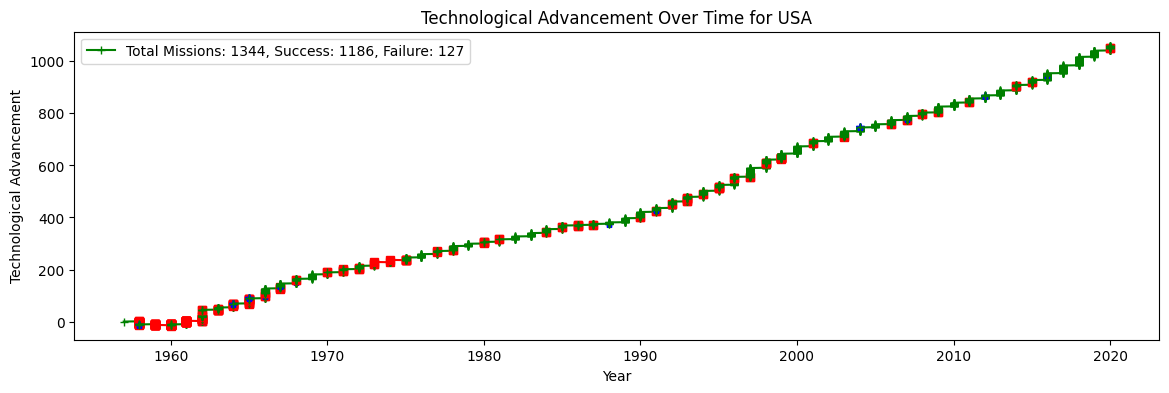

USA is advancing technologically with a net positive trend.


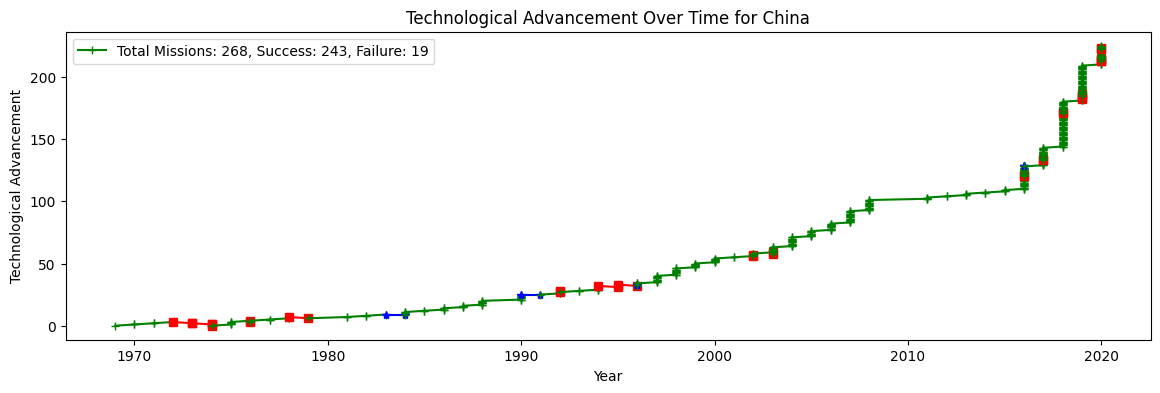

China is advancing technologically with a net positive trend.


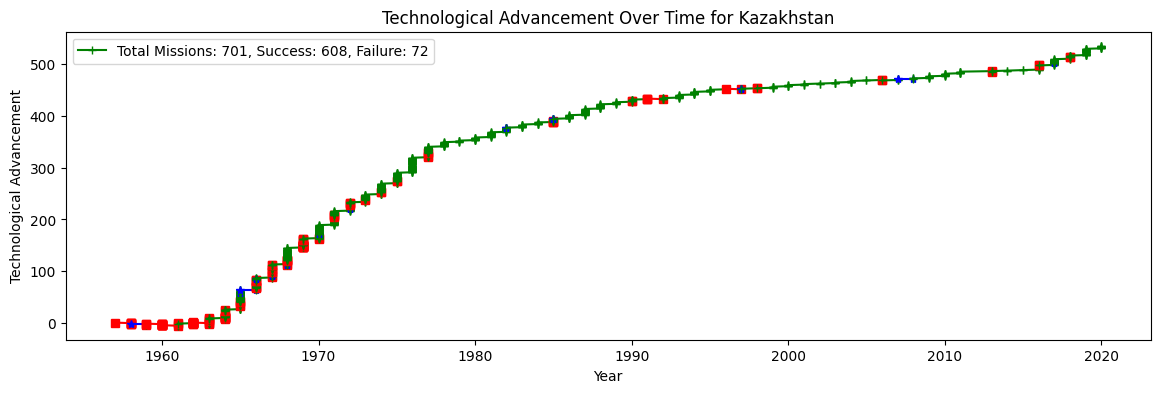

Kazakhstan is advancing technologically with a net positive trend.


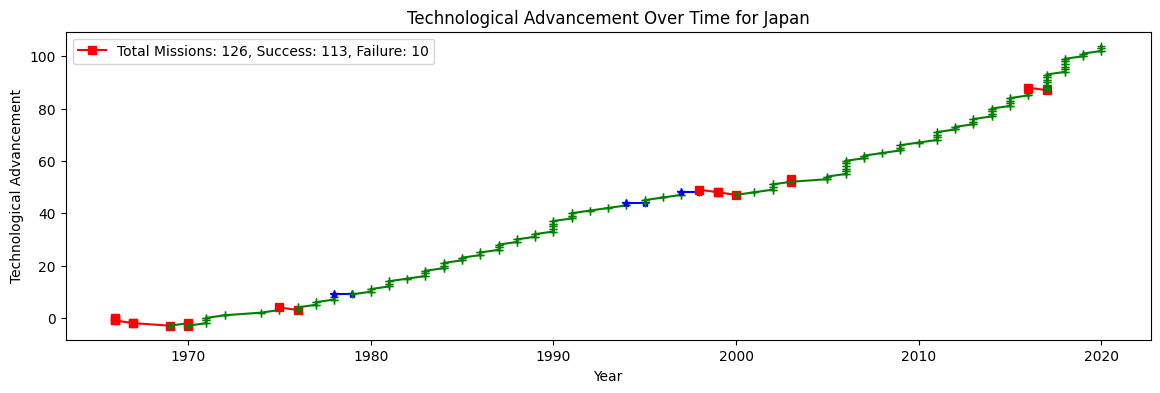

Japan is advancing technologically with a net positive trend.


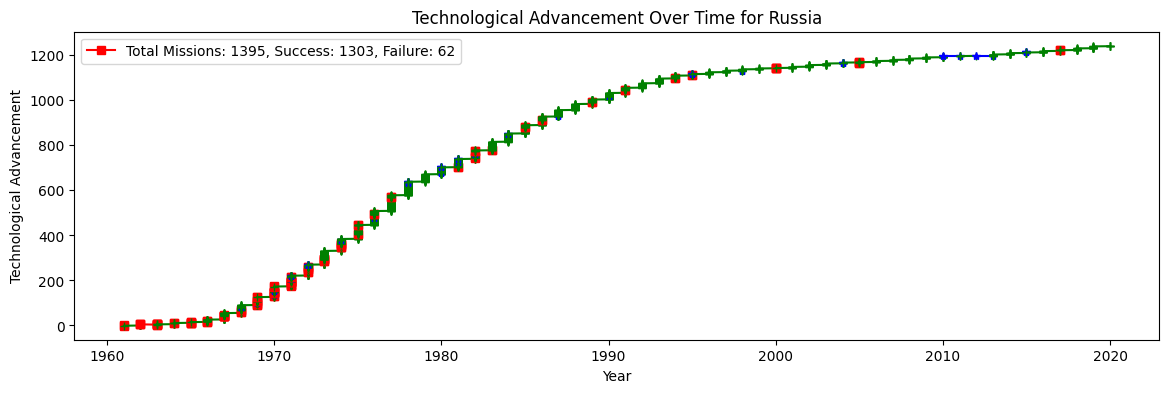

Russia is advancing technologically with a net positive trend.


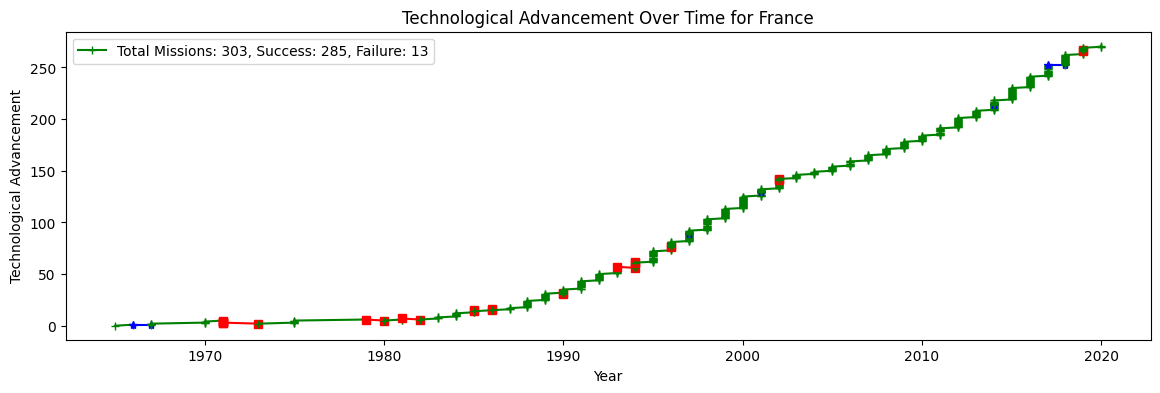

France is advancing technologically with a net positive trend.


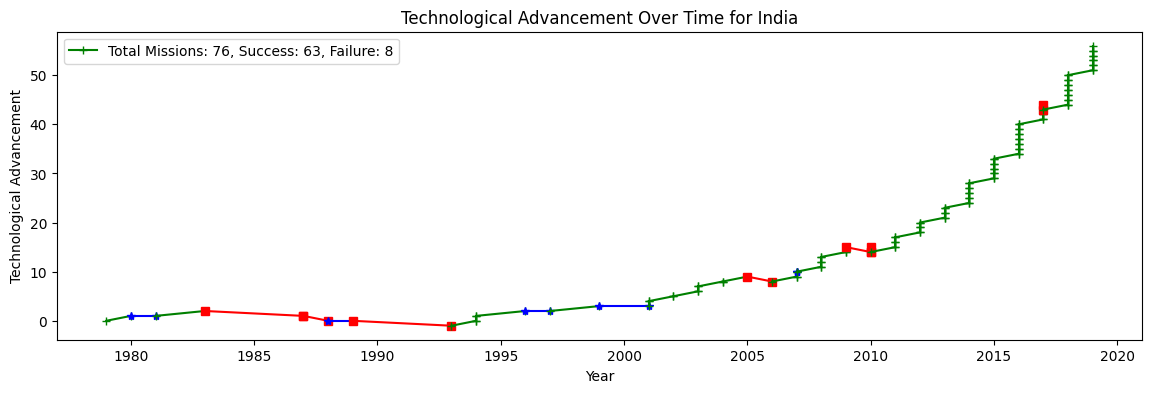

India is advancing technologically with a net positive trend.


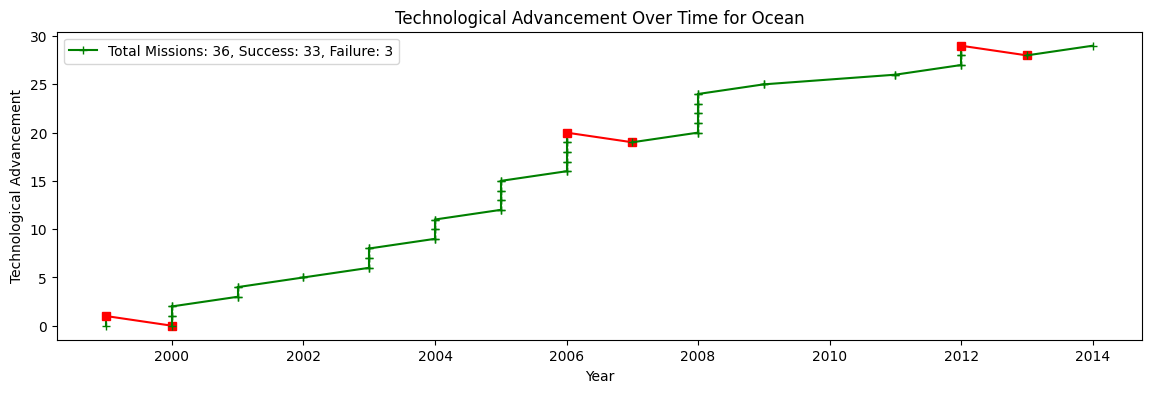

Ocean is advancing technologically with a net positive trend.


In [54]:
# 1.6 Technological Trend by each country one-by-one
def plot_technological_advancement(country_name):
    # Filter DataFrame for the specified country
    country_data = df1[df1['country'] == country_name].copy()
    
    # Convert 'date' column to datetime and extract the year
    country_data['date'] = pd.to_datetime(country_data['date'])
    country_data['year'] = country_data['date'].dt.year
    
    # Sort by date to ensure the line plot is chronological
    country_data = country_data.sort_values(by='date')
    
    # Initialize a column for technological advancement
    country_data['tech_advancement'] = 0
    
    # Calculate technological advancement: +1 for Success, -1 for Failure
    for i in range(1, len(country_data)):
        if country_data['Status Mission'].iloc[i] == 'Success':
            country_data['tech_advancement'].iloc[i] = country_data['tech_advancement'].iloc[i-1] + 1
        elif country_data['Status Mission'].iloc[i] == 'Failure':
            country_data['tech_advancement'].iloc[i] = country_data['tech_advancement'].iloc[i-1] - 1
        else:
            country_data['tech_advancement'].iloc[i] = country_data['tech_advancement'].iloc[i-1]
    
    # Plotting
    plt.figure(figsize=(14, 4))
    plt.title(f'Technological Advancement Over Time for {country_name}')
    plt.xlabel('Year')
    plt.ylabel('Technological Advancement')
    
    # Plot with different colors for success and failure
    for i in range(1, len(country_data)):
        if country_data['Status Mission'].iloc[i] == 'Success':
            plt.plot(country_data['year'].iloc[i-1:i+1], country_data['tech_advancement'].iloc[i-1:i+1], color='green', marker='+')
        elif country_data['Status Mission'].iloc[i] == 'Failure':
            plt.plot(country_data['year'].iloc[i-1:i+1], country_data['tech_advancement'].iloc[i-1:i+1], color='red', marker='s')
        else:
            plt.plot(country_data['year'].iloc[i-1:i+1], country_data['tech_advancement'].iloc[i-1:i+1], color='blue', marker='*')
    
    # Show total missions, success, and failure in the legend
    total_missions = len(country_data)
    total_success = (country_data['Status Mission'] == 'Success').sum()
    total_failure = (country_data['Status Mission'] == 'Failure').sum()
    plt.legend([f'Total Missions: {total_missions}, Success: {total_success}, Failure: {total_failure}'])
    
    plt.show()
    
    # Determine if the country is advancing technologically
    if country_data['tech_advancement'].iloc[-1] > 0:
        print(f"{country_name} is advancing technologically with a net positive trend.")
    else:
        print(f"{country_name} may need to improve their technological advancements in space missions.")

for country in country_names:
    plot_technological_advancement(country)

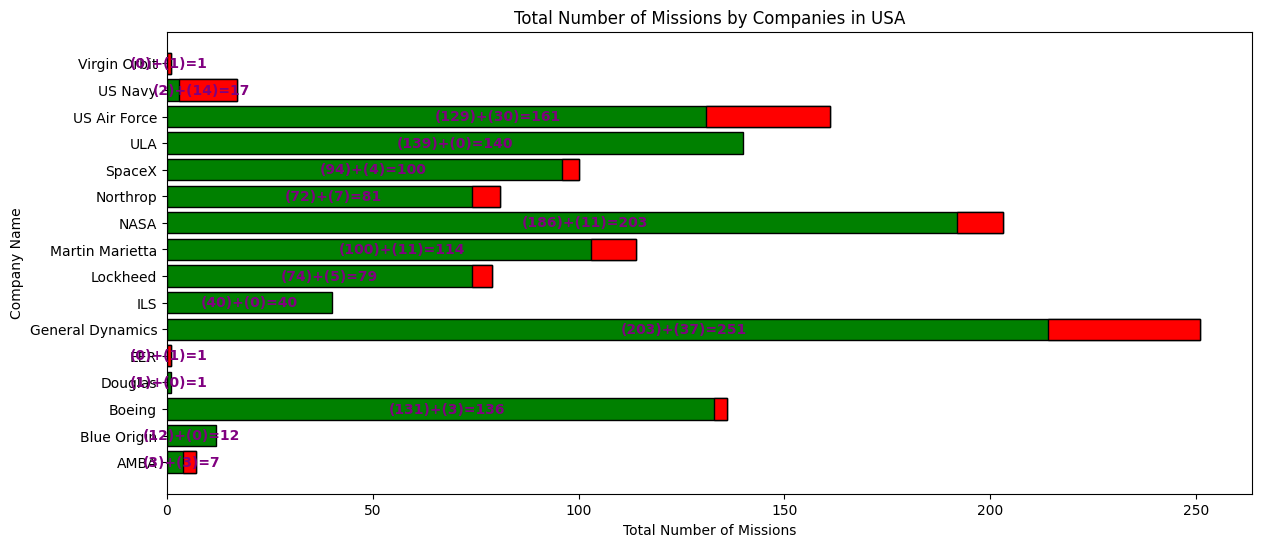

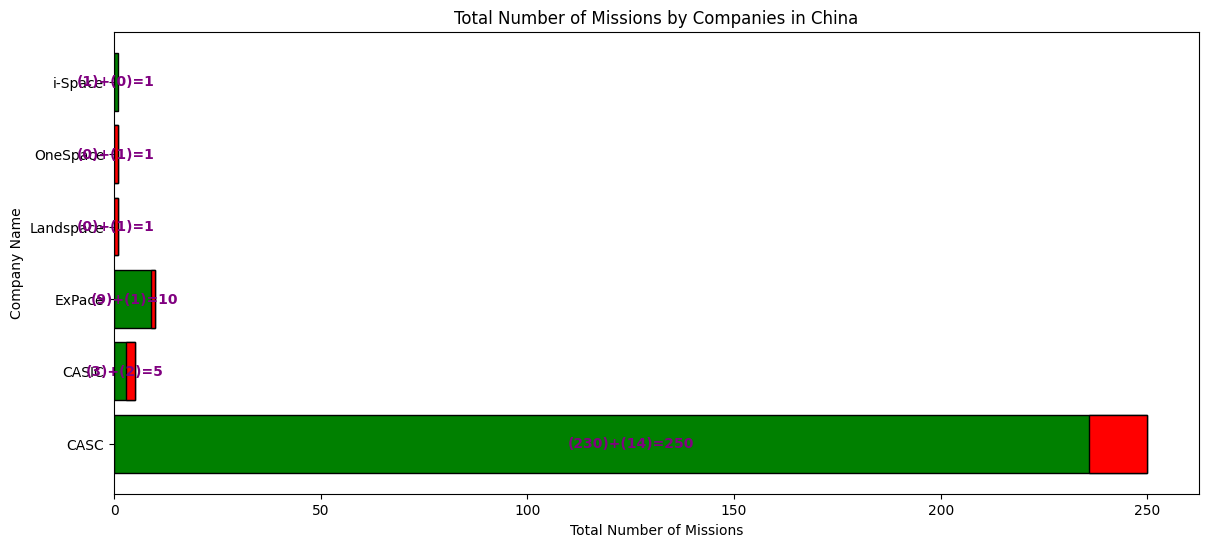

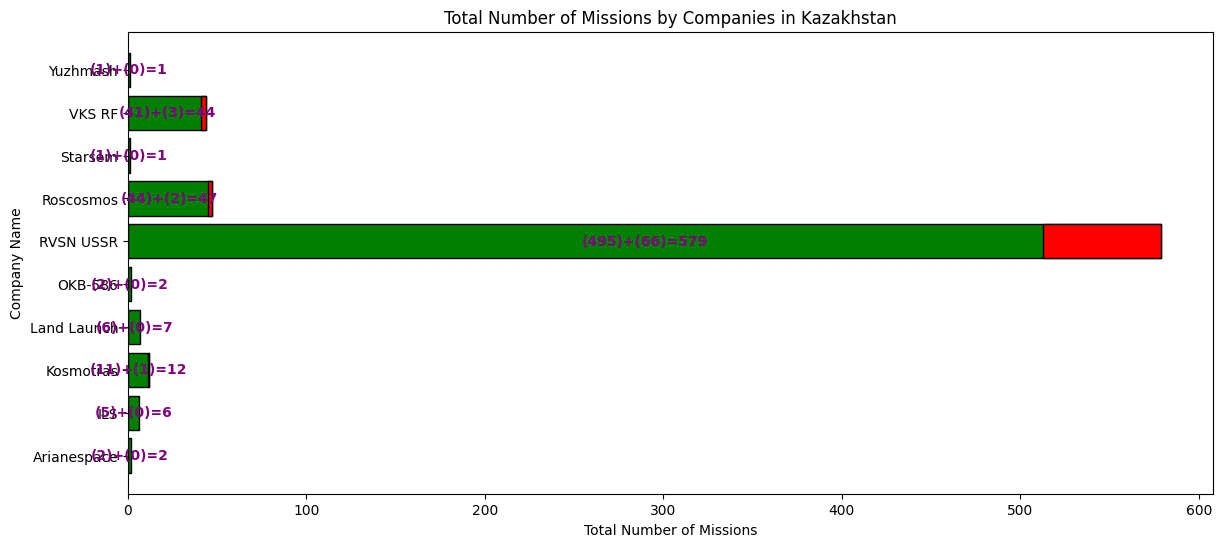

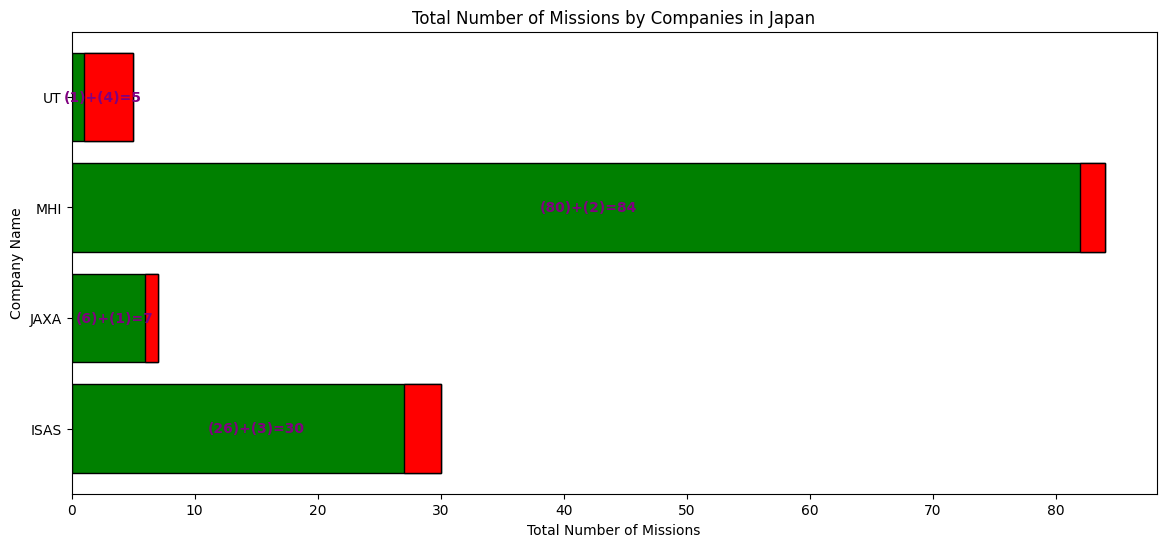

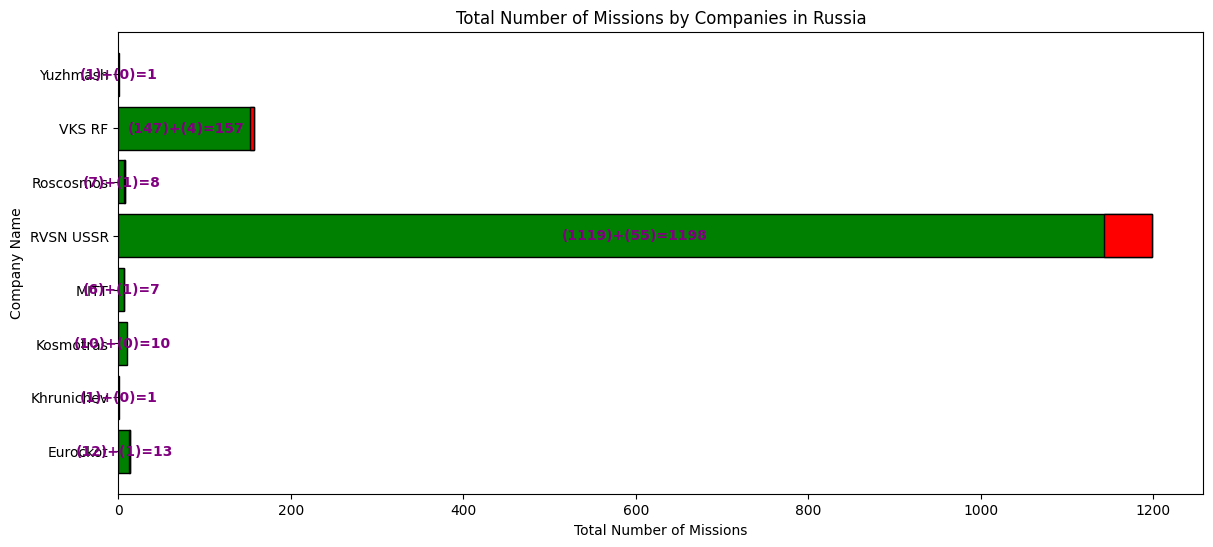

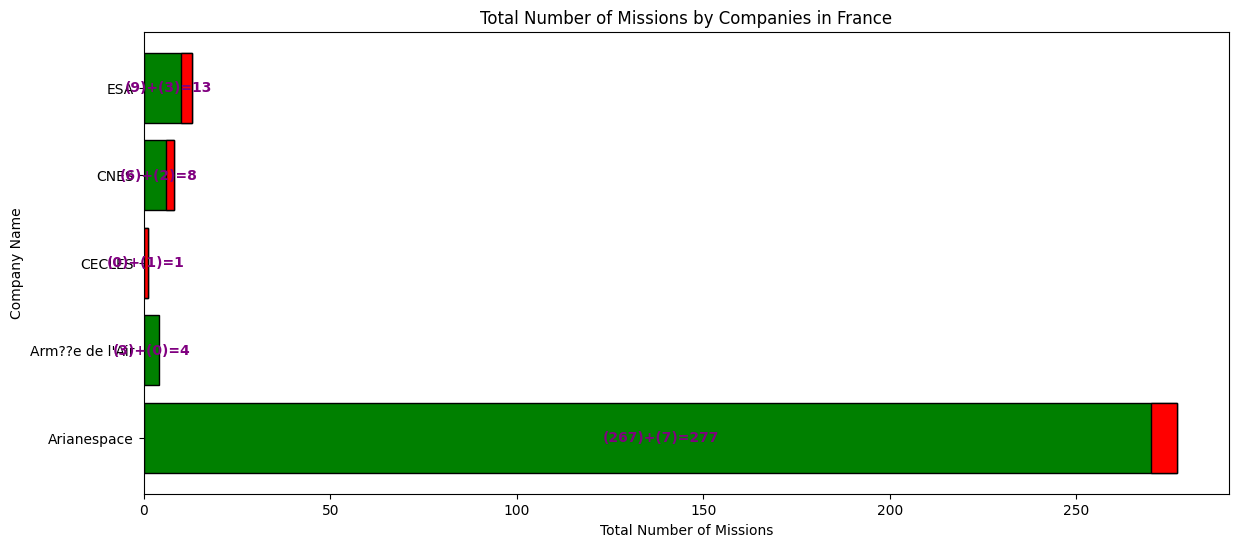

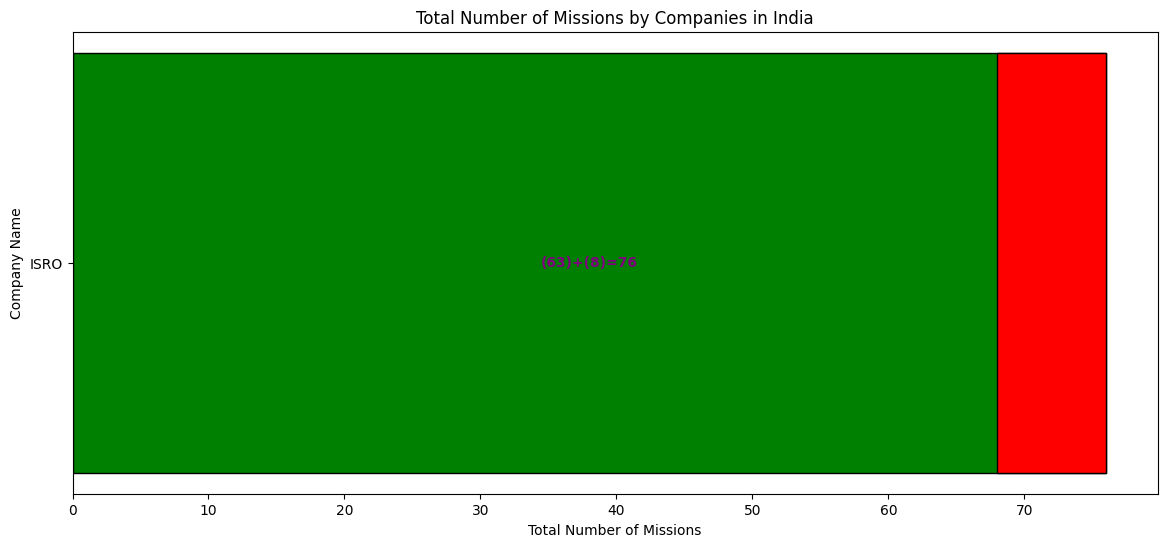

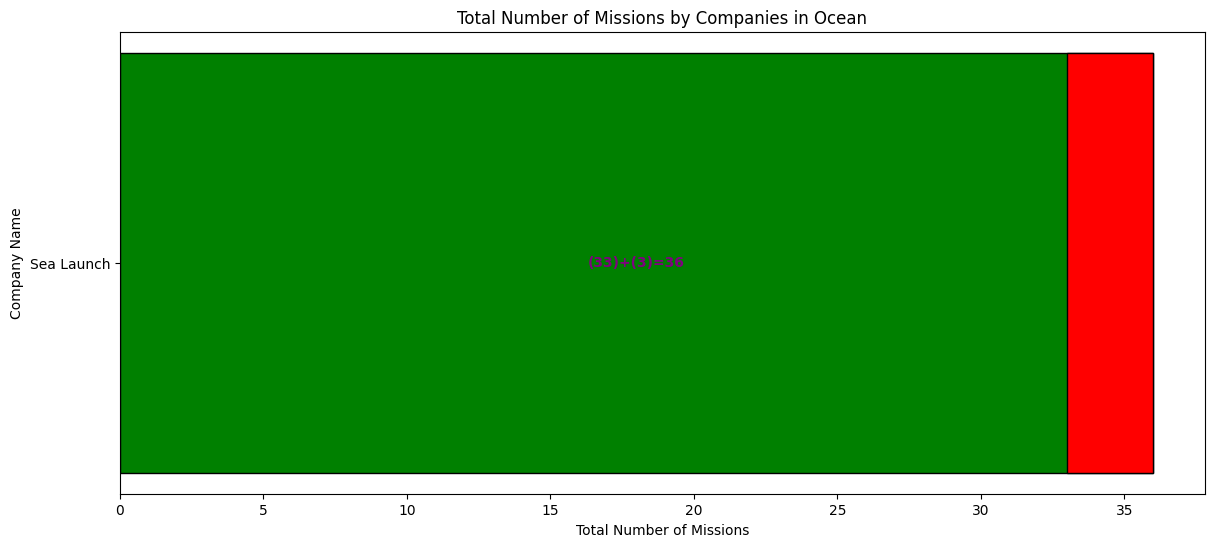

In [67]:
#1.7 Contribution of each comapany of all countries invidually in the accomplishment of space missions from 1957 onwards
def plot_company_missions(country_name):
    # Filter DataFrame for the specified country
    country_data = df1[df1['country'] == country_name].copy()
    
    # Group by Company Name and count total missions, successes, and failures
    company_missions = country_data.groupby('Company Name').size().reset_index(name='Total')
    company_success = country_data[country_data['Status Mission'] == 'Success'].groupby('Company Name').size().reset_index(name='Success')
    company_failure = country_data[country_data['Status Mission'] == 'Failure'].groupby('Company Name').size().reset_index(name='Failure')
    
    # Merge the dataframes
    company_data = company_missions.merge(company_success, on='Company Name', how='left').merge(company_failure, on='Company Name', how='left').fillna(0)
    
    # Plotting
    plt.figure(figsize=(14, 6))
    bars = plt.barh(company_data['Company Name'], company_data['Total'], color='green', edgecolor='black')
    
    for i, bar in enumerate(bars):
        company_name = company_data['Company Name'].iloc[i]
        total = company_data['Total'].iloc[i]
        success = int(company_data['Success'].iloc[i])
        failure = int(company_data['Failure'].iloc[i])
        
        # Right side of the bar should be red for the failures
        if failure > 0:
            plt.barh(company_name, failure, left=total-failure, color='red', edgecolor='black')
        
        # Text inside the bar
        plt.text(total / 2, bar.get_y() + bar.get_height() / 2, f'({success})+({failure})={total}', ha='center', va='center', color='purple', fontsize=10, weight='bold')
    
    plt.title(f'Total Number of Missions by Companies in {country_name}')
    plt.xlabel('Total Number of Missions')
    plt.ylabel('Company Name')
    
    plt.show()

for country in country_names:
    plot_company_missions(country)

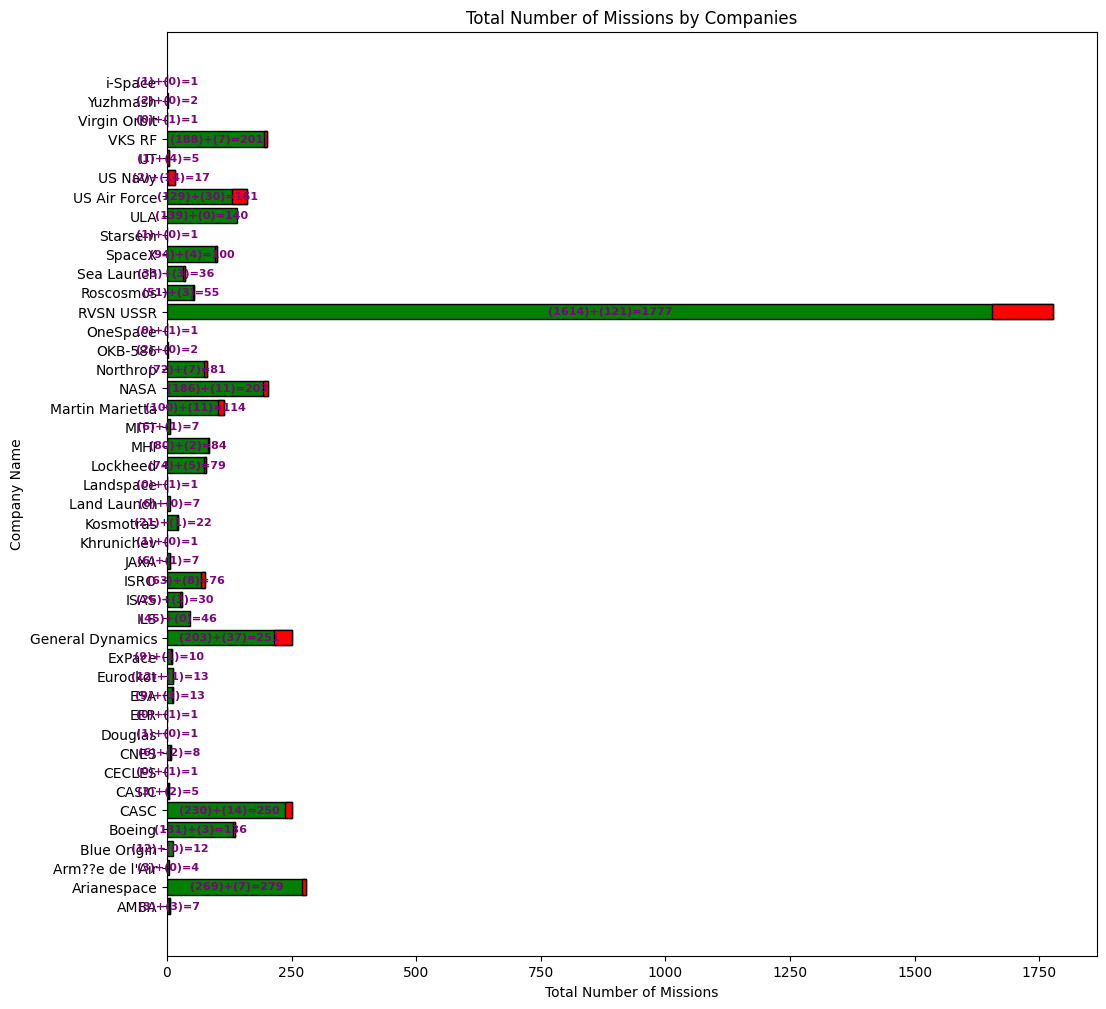

In [71]:
def plot_company_missions():
    # Group by Company Name and count total missions, successes, and failures
    company_missions = df1.groupby('Company Name').size().reset_index(name='Total')
    company_success = df1[df1['Status Mission'] == 'Success'].groupby('Company Name').size().reset_index(name='Success')
    company_failure = df1[df1['Status Mission'] == 'Failure'].groupby('Company Name').size().reset_index(name='Failure')
    
    # Merge the dataframes
    company_data = company_missions.merge(company_success, on='Company Name', how='left').merge(company_failure, on='Company Name', how='left').fillna(0)
    
    # Plotting
    plt.figure(figsize=(12, 12))
    bars = plt.barh(company_data['Company Name'], company_data['Total'], color='green', edgecolor='black')
    
    for i, bar in enumerate(bars):
        company_name = company_data['Company Name'].iloc[i]
        total = company_data['Total'].iloc[i]
        success = int(company_data['Success'].iloc[i])
        failure = int(company_data['Failure'].iloc[i])
        
        # Right side of the bar should be red for the failures
        if failure > 0:
            plt.barh(company_name, failure, left=total-failure, color='red', edgecolor='black')
        
        # Text inside the bar
        plt.text(total / 2, bar.get_y() + bar.get_height() / 2, f'({success})+({failure})={total}', ha='center', va='center', color='purple', fontsize=8, weight='bold')
    
    plt.title('Total Number of Missions by Companies')
    plt.xlabel('Total Number of Missions')
    plt.ylabel('Company Name')
    
    plt.show()

# Example usage
plot_company_missions()

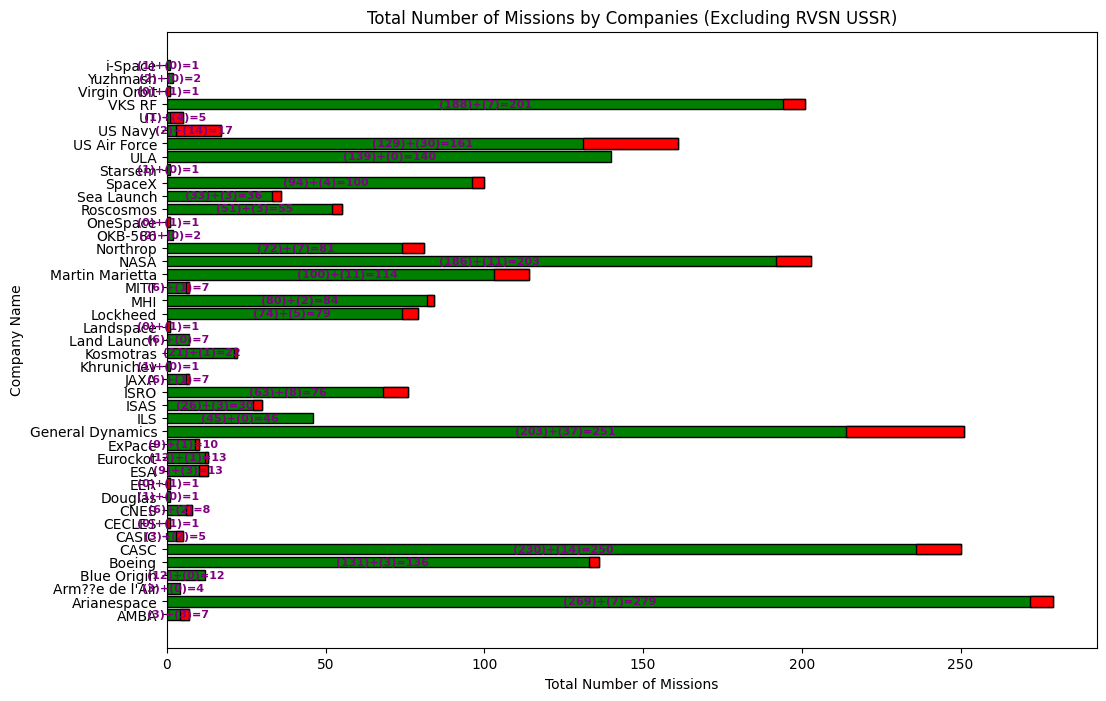

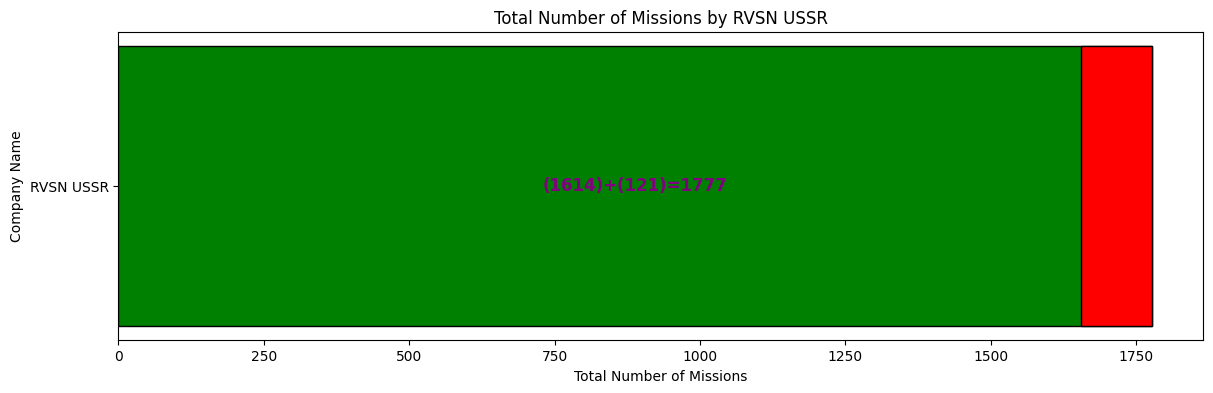

In [83]:
def plot_company_missions(exclude_company):
    # Filter out the specified company
    filtered_data = df1[df1['Company Name'] != exclude_company]

    # Group by Company Name and count total missions, successes, and failures
    company_missions = filtered_data.groupby('Company Name').size().reset_index(name='Total')
    company_success = filtered_data[filtered_data['Status Mission'] == 'Success'].groupby('Company Name').size().reset_index(name='Success')
    company_failure = filtered_data[filtered_data['Status Mission'] == 'Failure'].groupby('Company Name').size().reset_index(name='Failure')
    
    # Merge the dataframes
    company_data = company_missions.merge(company_success, on='Company Name', how='left').merge(company_failure, on='Company Name', how='left').fillna(0)
    
    # Plotting
    plt.figure(figsize=(12, 8))
    bars = plt.barh(company_data['Company Name'], company_data['Total'], color='green', edgecolor='black')
    
    for i, bar in enumerate(bars):
        company_name = company_data['Company Name'].iloc[i]
        total = company_data['Total'].iloc[i]
        success = int(company_data['Success'].iloc[i])
        failure = int(company_data['Failure'].iloc[i])
        
        # Right side of the bar should be red for the failures
        if failure > 0:
            plt.barh(company_name, failure, left=total-failure, color='red', edgecolor='black')
        
        # Text inside the bar
        plt.text(total / 2, bar.get_y() + bar.get_height() / 2, f'({success})+({failure})={total}', ha='center', va='center', color='purple', fontsize=8, weight='bold')
    
    plt.title('Total Number of Missions by Companies (Excluding RVSN USSR)')
    plt.xlabel('Total Number of Missions')
    plt.ylabel('Company Name')
    
    plt.show()

def plot_excluded_company_missions(exclude_company):
    # Filter data for the specified company
    company_data = df1[df1['Company Name'] == exclude_company]

    # Group by Company Name and count total missions, successes, and failures
    company_missions = company_data.groupby('Company Name').size().reset_index(name='Total')
    company_success = company_data[company_data['Status Mission'] == 'Success'].groupby('Company Name').size().reset_index(name='Success')
    company_failure = company_data[company_data['Status Mission'] == 'Failure'].groupby('Company Name').size().reset_index(name='Failure')
    
    # Merge the dataframes
    company_data = company_missions.merge(company_success, on='Company Name', how='left').merge(company_failure, on='Company Name', how='left').fillna(0)

    # Plotting
    plt.figure(figsize=(14, 4))
    bars = plt.barh(company_data['Company Name'], company_data['Total'], color='green', edgecolor='black')
    
    for i, bar in enumerate(bars):
        company_name = company_data['Company Name'].iloc[i]
        total = company_data['Total'].iloc[i]
        success = int(company_data['Success'].iloc[i])
        failure = int(company_data['Failure'].iloc[i])
        
        # Right side of the bar should be red for the failures
        if failure > 0:
            plt.barh(company_name, failure, left=total-failure, color='red', edgecolor='black')
        
        # Text inside the bar
        plt.text(total / 2, bar.get_y() + bar.get_height() / 2, f'({success})+({failure})={total}', ha='center', va='center', color='purple', fontsize=12, weight='bold')
    
    plt.title(f'Total Number of Missions by {exclude_company}')
    plt.xlabel('Total Number of Missions')
    plt.ylabel('Company Name')
    
    plt.show()

# Example usage
plot_company_missions('RVSN USSR')
plot_excluded_company_missions('RVSN USSR')

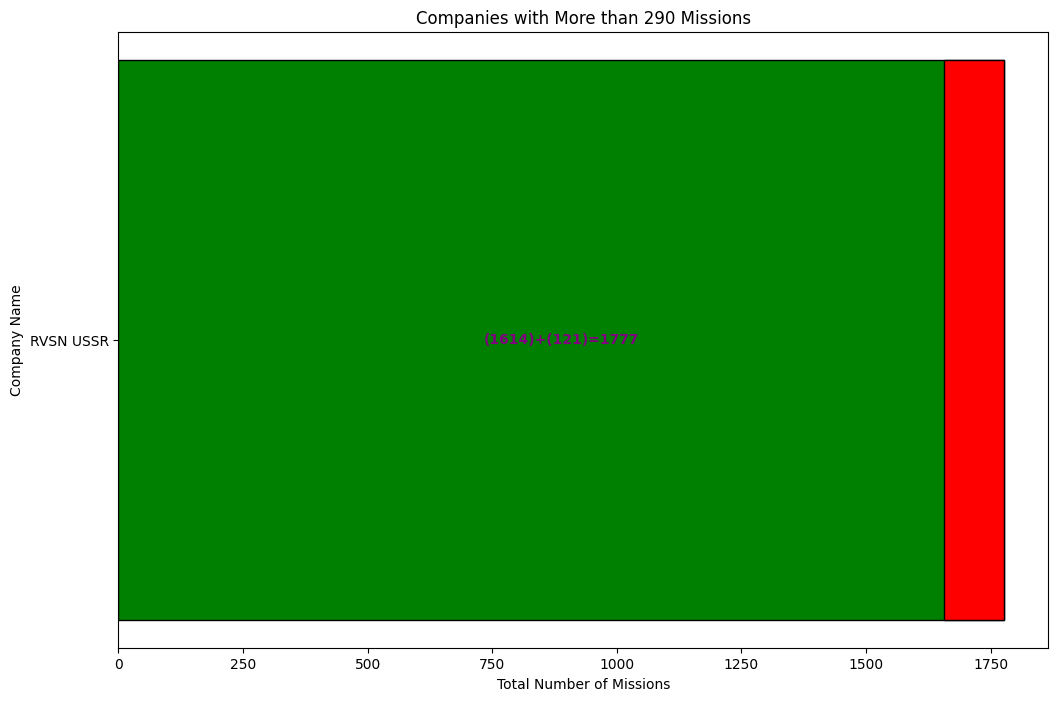

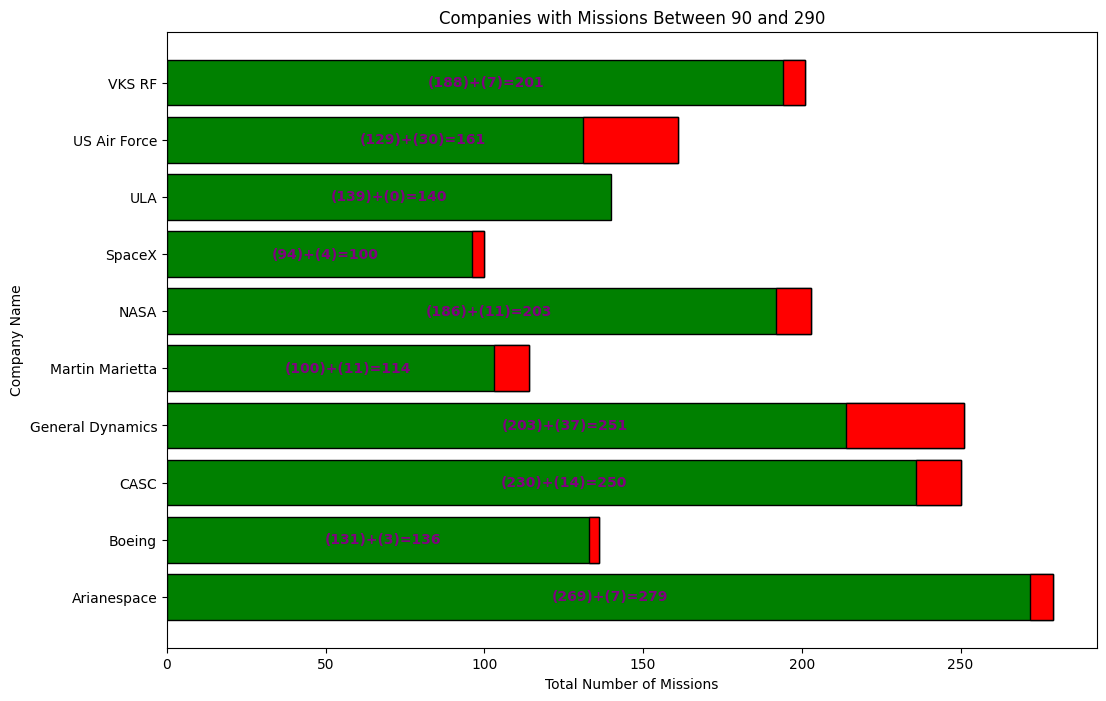

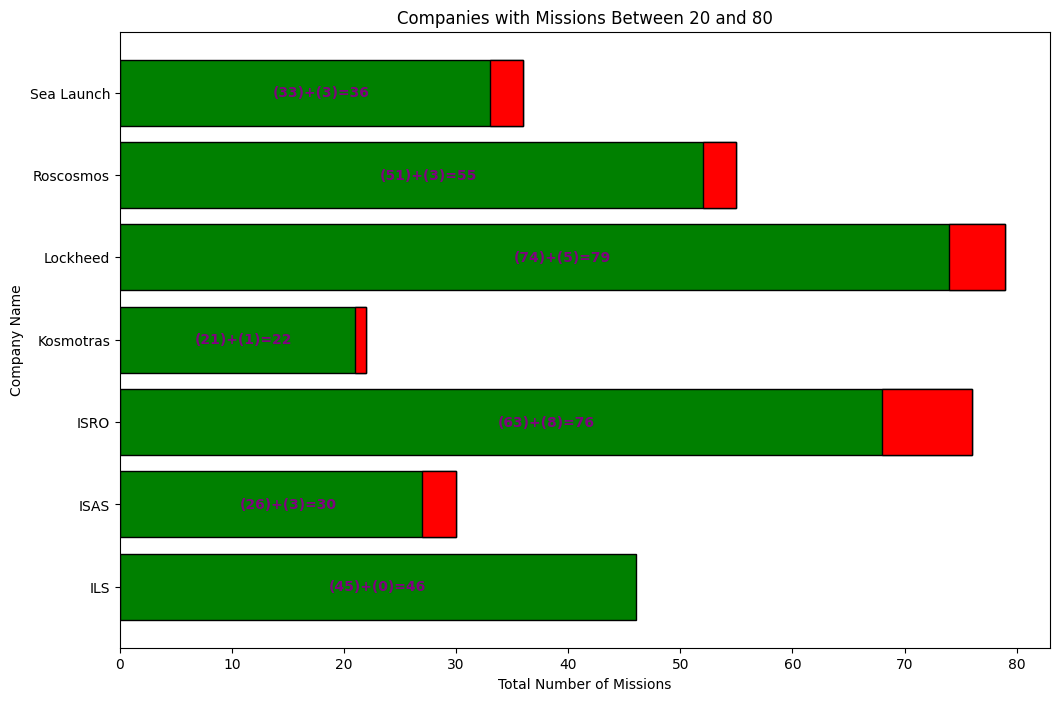

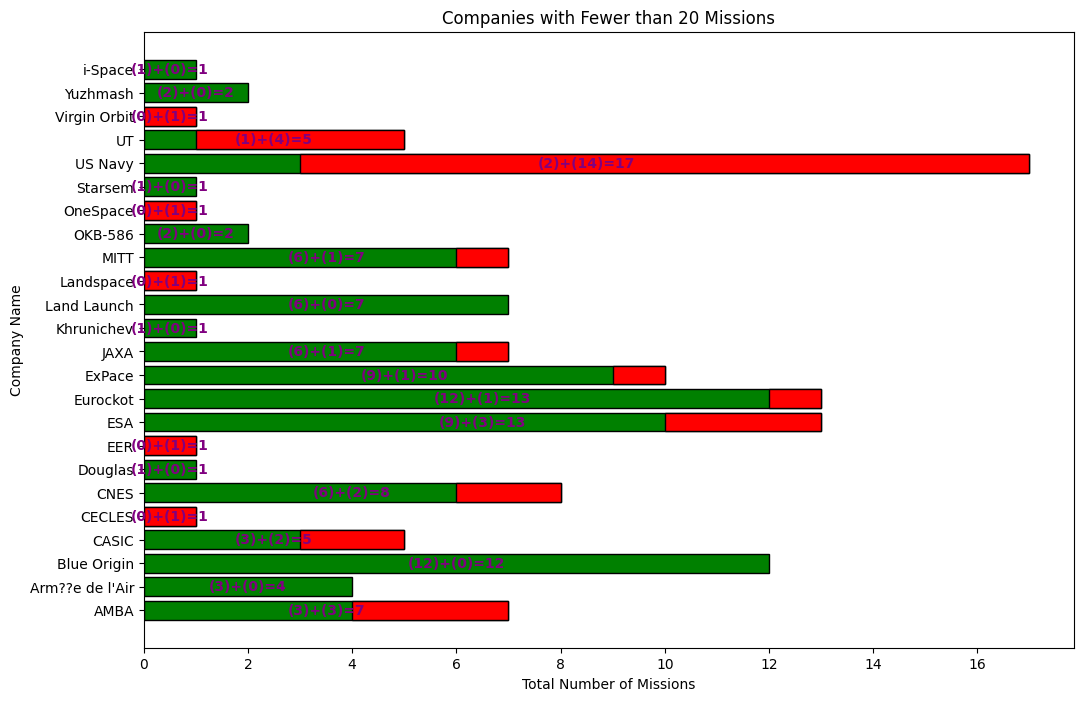

In [86]:
def plot_company_missions(company_data, title):
    # Plotting
    plt.figure(figsize=(12, 8))
    bars = plt.barh(company_data['Company Name'], company_data['Total'], color='green', edgecolor='black')
    
    for i, bar in enumerate(bars):
        company_name = company_data['Company Name'].iloc[i]
        total = company_data['Total'].iloc[i]
        success = int(company_data['Success'].iloc[i])
        failure = int(company_data['Failure'].iloc[i])
        
        # Right side of the bar should be red for the failures
        if failure > 0:
            plt.barh(company_name, failure, left=total-failure, color='red', edgecolor='black')
        
        # Text inside the bar
        plt.text(total / 2, bar.get_y() + bar.get_height() / 2, f'({success})+({failure})={total}', ha='center', va='center', color='purple', fontsize=10, weight='bold')
    
    plt.title(title)
    plt.xlabel('Total Number of Missions')
    plt.ylabel('Company Name')
    
    plt.show()

def generate_plots(df1):
    # Group by Company Name and count total missions, successes, and failures
    company_missions = df1.groupby('Company Name').size().reset_index(name='Total')
    company_success = df1[df1['Status Mission'] == 'Success'].groupby('Company Name').size().reset_index(name='Success')
    company_failure = df1[df1['Status Mission'] == 'Failure'].groupby('Company Name').size().reset_index(name='Failure')
    
    # Merge the dataframes
    company_data = company_missions.merge(company_success, on='Company Name', how='left').merge(company_failure, on='Company Name', how='left').fillna(0)

    # Filter for companies with more than 290 missions
    more_than_290 = company_data[company_data['Total'] > 290]
    plot_company_missions(more_than_290, 'Companies with More than 290 Missions')

    # Filter for companies with missions between 90 and 290
    between_90_and_290 = company_data[(company_data['Total'] > 90) & (company_data['Total'] <= 290)]
    plot_company_missions(between_90_and_290, 'Companies with Missions Between 90 and 290')

    # Filter for companies with missions between 20 and 80
    between_20_and_80 = company_data[(company_data['Total'] > 20) & (company_data['Total'] <= 80)]
    plot_company_missions(between_20_and_80, 'Companies with Missions Between 20 and 80')

    # Filter for companies with fewer than 20 missions
    less_than_20 = company_data[company_data['Total'] <= 20]
    plot_company_missions(less_than_20, 'Companies with Fewer than 20 Missions')

# Example usage
generate_plots(df1)

In [89]:
# Objective No 2
# Comparative insights into the achievements and capabilities of the USSR and the US during the early Space Race.

In [90]:
# The Space Race between the United States and the Soviet Union began shortly after World War II and continued until the early 1970s.

# Countries that were part of the USSR:

# Russia (Russia was the largest and leading country of the USSR)
# Kazakhstan (was part of the USSR)
# Countries aligned with the US or influenced by the US:

# USA
# Japan
# France

In [91]:
# Array containing countries that were part of the USSR
ussr_aligned = ['Russia', 'Kazakhstan']

# Array containing countries that were aligned with the US
us_aligned = ['USA', 'Japan', 'France']

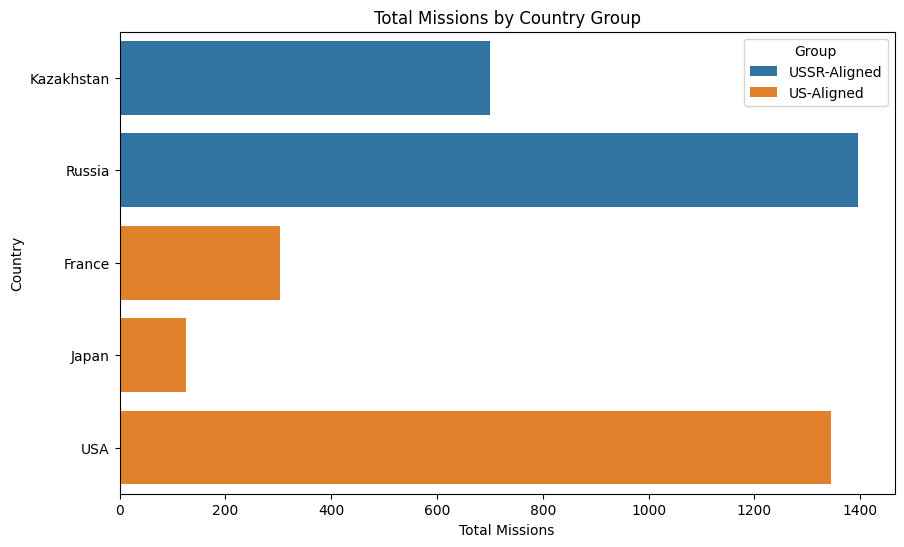

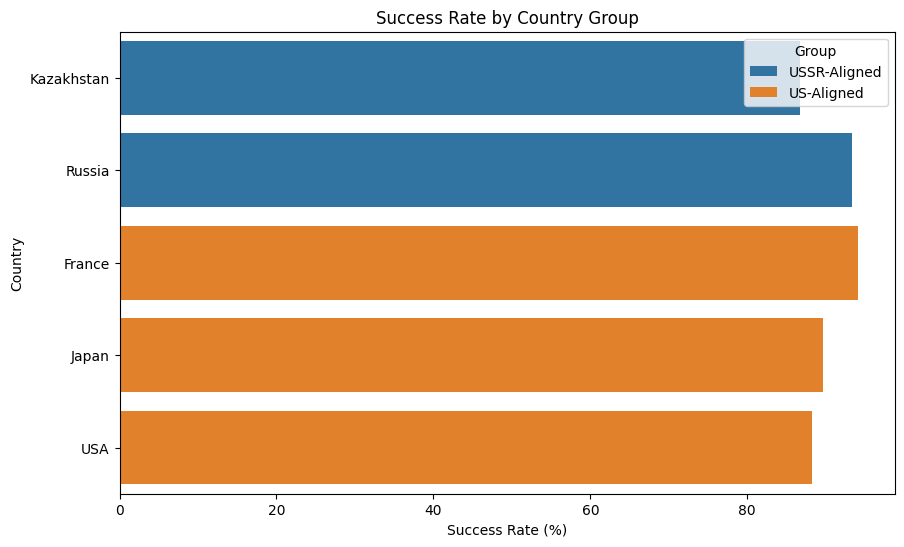

Group: USSR-Aligned, Country: Kazakhstan
Total Missions: 701, Successes: 608, Failures: 72, Success Rate: 86.73%

Group: USSR-Aligned, Country: Russia
Total Missions: 1395, Successes: 1303, Failures: 62, Success Rate: 93.41%

Group: US-Aligned, Country: France
Total Missions: 303, Successes: 285, Failures: 13, Success Rate: 94.06%

Group: US-Aligned, Country: Japan
Total Missions: 126, Successes: 113, Failures: 10, Success Rate: 89.68%

Group: US-Aligned, Country: USA
Total Missions: 1344, Successes: 1186, Failures: 127, Success Rate: 88.24%



In [92]:
# Arrays containing countries aligned with the USSR and the US
ussr_aligned = ['Russia', 'Kazakhstan']
us_aligned = ['USA', 'Japan', 'France']

# Step 1: Filter the Data
ussr_data = df1[df1['country'].isin(ussr_aligned)]
us_data = df1[df1['country'].isin(us_aligned)]

# Step 2: Aggregate Data
# Aggregate data for USSR-aligned countries
ussr_summary = ussr_data.groupby('country').agg(
    Total_Missions=('Status Mission', 'count'),
    Successes=('Status Mission', lambda x: (x == 'Success').sum()),
    Failures=('Status Mission', lambda x: (x == 'Failure').sum())
)

# Aggregate data for US-aligned countries
us_summary = us_data.groupby('country').agg(
    Total_Missions=('Status Mission', 'count'),
    Successes=('Status Mission', lambda x: (x == 'Success').sum()),
    Failures=('Status Mission', lambda x: (x == 'Failure').sum())
)

# Step 3: Combine Summaries and Calculate Success Rates
comparison_summary = pd.concat([ussr_summary, us_summary], keys=['USSR-Aligned', 'US-Aligned']).reset_index()
comparison_summary.columns = ['Group', 'Country', 'Total Missions', 'Successes', 'Failures']
comparison_summary['Success Rate (%)'] = (comparison_summary['Successes'] / comparison_summary['Total Missions']) * 100

# Step 4: Generate Visualizations
# Bar plot for total missions
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Missions', y='Country', hue='Group', data=comparison_summary)
plt.title('Total Missions by Country Group')
plt.xlabel('Total Missions')
plt.ylabel('Country')
plt.legend(title='Group')
plt.show()

# Bar plot for success rate
plt.figure(figsize=(10, 6))
sns.barplot(x='Success Rate (%)', y='Country', hue='Group', data=comparison_summary)
plt.title('Success Rate by Country Group')
plt.xlabel('Success Rate (%)')
plt.ylabel('Country')
plt.legend(title='Group')
plt.show()

# Insights
for index, row in comparison_summary.iterrows():
    print(f"Group: {row['Group']}, Country: {row['Country']}")
    print(f"Total Missions: {row['Total Missions']}, Successes: {row['Successes']}, Failures: {row['Failures']}, Success Rate: {row['Success Rate (%)']:.2f}%")
    print()

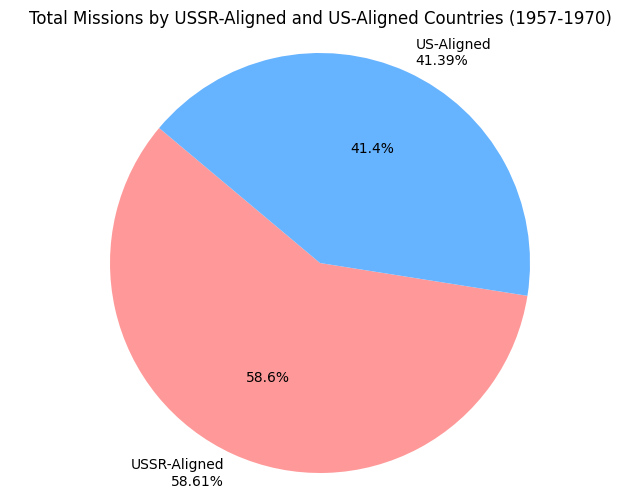

In [93]:
def plot_pie_chart_ussr_vs_us(df1, ussr_aligned, us_aligned):
    # Filter data for the given date range
    df1['date'] = pd.to_datetime(df1['date'])
    filtered_data = df1[(df1['date'] >= '1957-01-01') & (df1['date'] <= '1970-12-31')]
    
    # Filter data for USSR-aligned and US-aligned countries
    ussr_data = filtered_data[filtered_data['country'].isin(ussr_aligned)]
    us_data = filtered_data[filtered_data['country'].isin(us_aligned)]
    
    # Calculate total missions for each group
    ussr_missions = ussr_data.shape[0]
    us_missions = us_data.shape[0]
    
    # Calculate percentages
    total_missions = ussr_missions + us_missions
    ussr_percentage = (ussr_missions / total_missions) * 100
    us_percentage = (us_missions / total_missions) * 100
    
    # Prepare data for pie chart
    labels = ['USSR-Aligned', 'US-Aligned']
    sizes = [ussr_missions, us_missions]
    percentages = [f'{ussr_percentage:.2f}%', f'{us_percentage:.2f}%']
    labels_with_percentages = [f'{label}\n{percent}' for label, percent in zip(labels, percentages)]
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels_with_percentages, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    plt.title('Total Missions by USSR-Aligned and US-Aligned Countries (1957-1970)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Example usage:
plot_pie_chart_ussr_vs_us(df1, ussr_aligned, us_aligned)

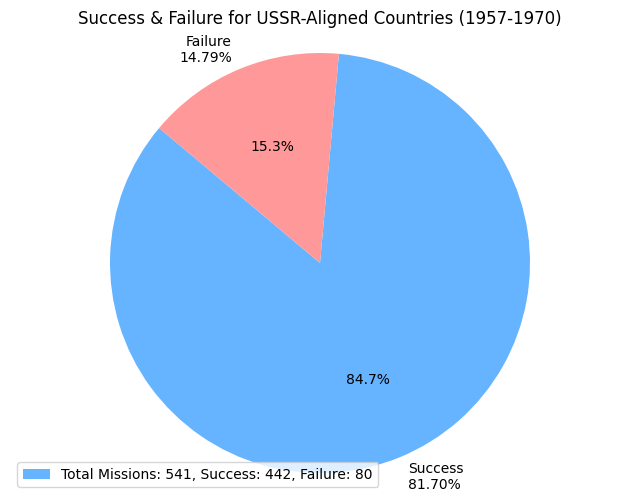

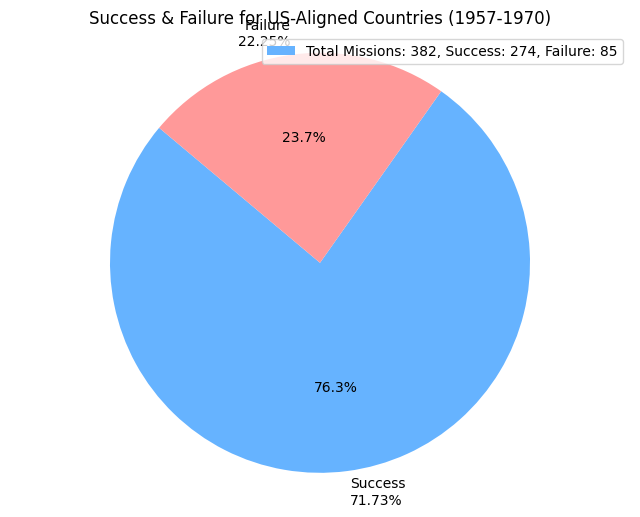

In [97]:
def plot_pie_success_failure_ussr(df1, ussr_aligned):
    # Filter data for the given date range
    df1['date'] = pd.to_datetime(df1['date'])
    filtered_data = df1[(df1['date'] >= '1957-01-01') & (df1['date'] <= '1970-12-31')]
    
    # Filter data for USSR-aligned countries
    ussr_data = filtered_data[filtered_data['country'].isin(ussr_aligned)]
    
    # Calculate total missions, successes, and failures
    total_missions = ussr_data.shape[0]
    successes = ussr_data[ussr_data['Status Mission'] == 'Success'].shape[0]
    failures = ussr_data[ussr_data['Status Mission'] == 'Failure'].shape[0]
    
    # Prepare data for pie chart
    labels = ['Success', 'Failure']
    sizes = [successes, failures]
    colors = ['#66b3ff', '#ff9999']
    percentages = [f'{(successes/total_missions)*100:.2f}%', f'{(failures/total_missions)*100:.2f}%']
    labels_with_percentages = [f'{label}\n{percent}' for label, percent in zip(labels, percentages)]
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels_with_percentages, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title('Success & Failure for USSR-Aligned Countries (1957-1970)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend([f'Total Missions: {total_missions}, Success: {successes}, Failure: {failures}'])
    plt.show()

# Example usage:
plot_pie_success_failure_ussr(df1, ussr_aligned)

def plot_pie_success_failure_us(df1, us_aligned):
    # Filter data for the given date range
    df1['date'] = pd.to_datetime(df1['date'])
    filtered_data = df1[(df1['date'] >= '1957-01-01') & (df1['date'] <= '1970-12-31')]
    
    # Filter data for US-aligned countries
    us_data = filtered_data[filtered_data['country'].isin(us_aligned)]
    
    # Calculate total missions, successes, and failures
    total_missions = us_data.shape[0]
    successes = us_data[us_data['Status Mission'] == 'Success'].shape[0]
    failures = us_data[us_data['Status Mission'] == 'Failure'].shape[0]
    
    # Prepare data for pie chart
    labels = ['Success', 'Failure']
    sizes = [successes, failures]
    colors = ['#66b3ff', '#ff9999']
    percentages = [f'{(successes/total_missions)*100:.2f}%', f'{(failures/total_missions)*100:.2f}%']
    labels_with_percentages = [f'{label}\n{percent}' for label, percent in zip(labels, percentages)]
    
    # Plotting
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels_with_percentages, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title('Success & Failure for US-Aligned Countries (1957-1970)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend([f'Total Missions: {total_missions}, Success: {successes}, Failure: {failures}'])
    plt.show()

# Example usage:
plot_pie_success_failure_us(df1, us_aligned)



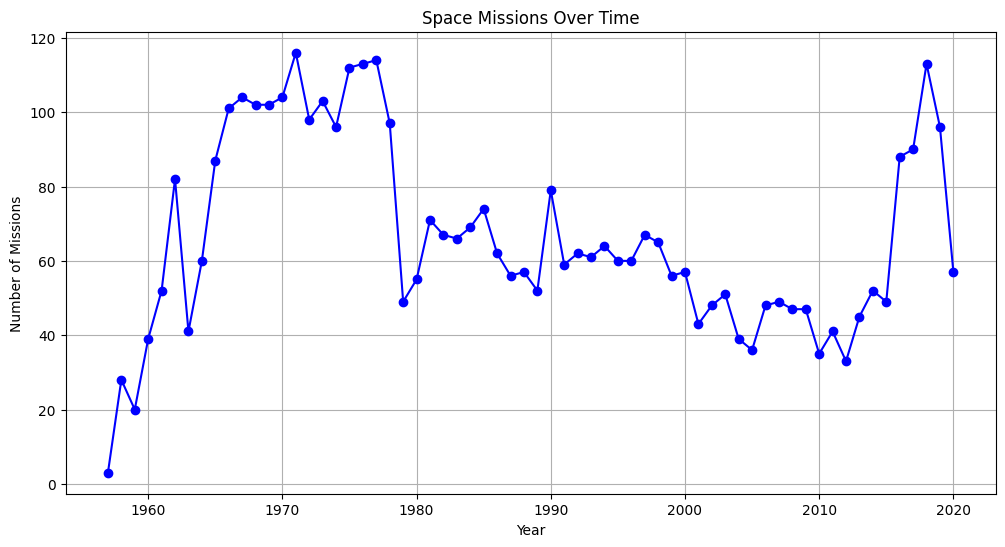

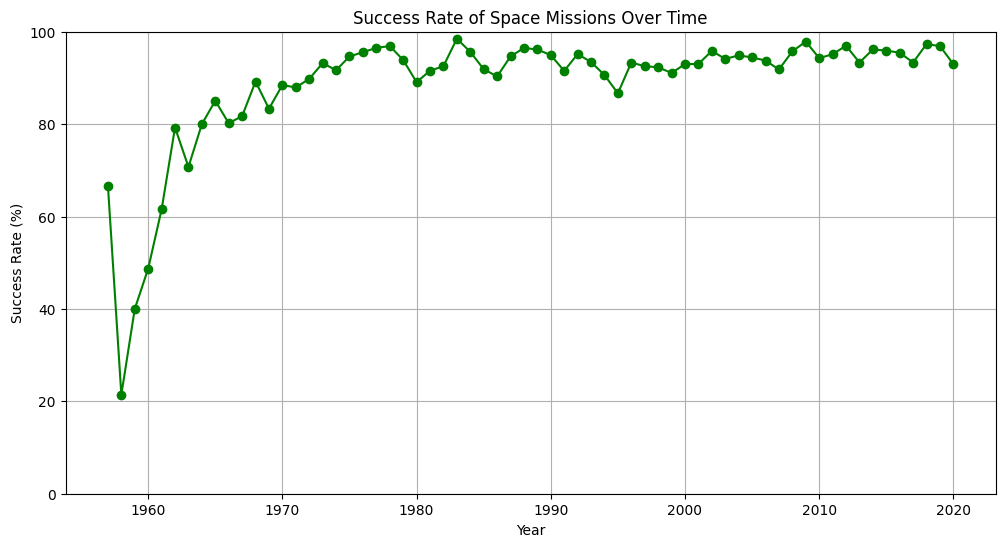

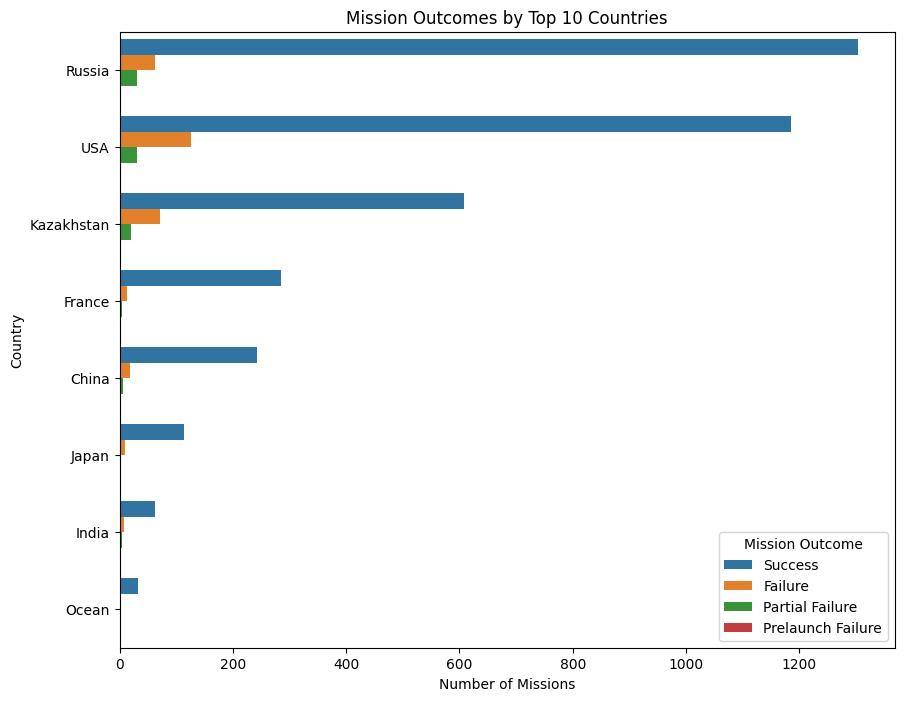

In [98]:

# Objective no 3 and 4
# Visualizations that effectively communicate the trends, milestones, and competitive dynamics in
# space exploration.
# • A deeper understanding of the impact of early space missions on subsequent advancements in
# spaceflight technology

def plot_space_exploration_trends(df1):
    # Convert date column to datetime format
    df1['date'] = pd.to_datetime(df1['date'])
    
    # Extract year from date
    df1['year'] = df1['date'].dt.year
    
    # Group by year and count missions
    missions_by_year = df1.groupby('year').size()
    
    # Plotting mission trends over time
    plt.figure(figsize=(12, 6))
    missions_by_year.plot(kind='line', marker='o', color='b')
    plt.title('Space Missions Over Time')
    plt.xlabel('Year')
    plt.ylabel('Number of Missions')
    plt.grid(True)
    plt.show()
    
    # Plotting success rate over time
    df1['success'] = df1['Status Mission'] == 'Success'
    success_rate_by_year = df1.groupby('year')['success'].mean() * 100
    
    plt.figure(figsize=(12, 6))
    success_rate_by_year.plot(kind='line', marker='o', color='g')
    plt.title('Success Rate of Space Missions Over Time')
    plt.xlabel('Year')
    plt.ylabel('Success Rate (%)')
    plt.ylim(0, 100)
    plt.grid(True)
    plt.show()
    
    # Plotting mission outcomes by country
    country_counts = df1['country'].value_counts()
    top_countries = country_counts.head(10).index
    
    df_top_countries = df1[df1['country'].isin(top_countries)]
    plt.figure(figsize=(10, 8))
    sns.countplot(y='country', hue='Status Mission', data=df_top_countries, order=top_countries)
    plt.title('Mission Outcomes by Top 10 Countries')
    plt.xlabel('Number of Missions')
    plt.ylabel('Country')
    plt.legend(title='Mission Outcome')
    plt.show()

# Example usage:
plot_space_exploration_trends(df1)
